In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA

In [3]:
# Let's see the info of data set
house.info()

# Observation:
# Rows: 1460, Columns: 81
# There are columns having null values, but most of them are object columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Create Dataframe of numeric columns and skip the object columns

df_numeric_house = house.select_dtypes(include=['float64', 'int64'])
df_numeric_house.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:

# Summary of new data frame
df_numeric_house.info()

# Observations
# Now there are 38 columns
# now only two columns (LotFrontage, GarageYrBlt) has some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [7]:
# Now based on data description, there are some categorical variables which we will drop for now.

df_numeric_house = df_numeric_house.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
df_numeric_house.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [8]:
# We can also drop the Id columns which is not adding any value
df_numeric_house = df_numeric_house.drop('Id', axis=1)

df_numeric_house.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


#### Finding Outliers

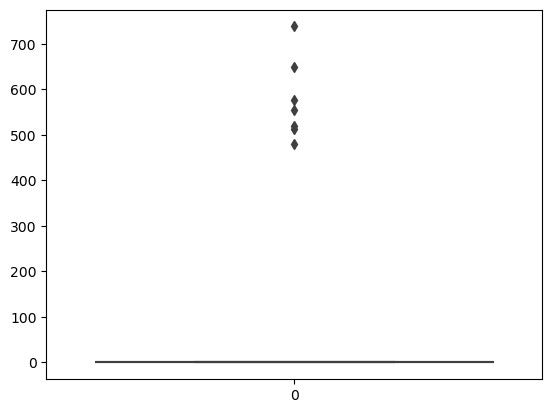

(1453, 81)

In [9]:
# Find and remove outliers based on columns selected from house.describe data. These columns have extream difference between min and max.
sns.boxplot(house['PoolArea'])
plt.show()
# Let's use the standard formula to remove outliers
Q1 = house['PoolArea'].quantile(0.1)
Q3 = house['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['PoolArea'] >= Q1 - 1.5*IQR) & (house['PoolArea'] <= Q3 + 1.5*IQR)]
house.shape

# Observations:

# removed outliers using the standard formula to find the outliers

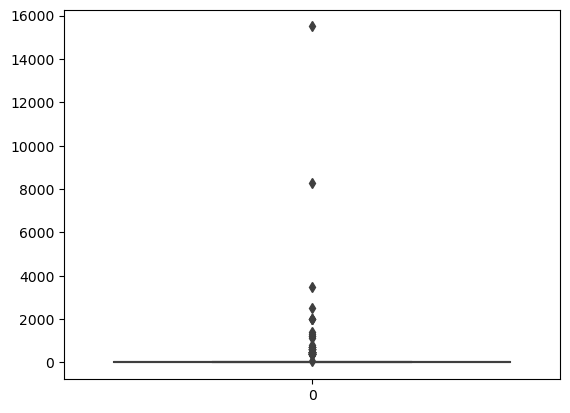

(1402, 81)

In [10]:
sns.boxplot(house['MiscVal'])
plt.show()
Q1 = house['MiscVal'].quantile(0.1)
Q3 = house['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MiscVal'] >= Q1 - 1.5*IQR) & (house['MiscVal'] <= Q3 + 1.5*IQR)]
house.shape

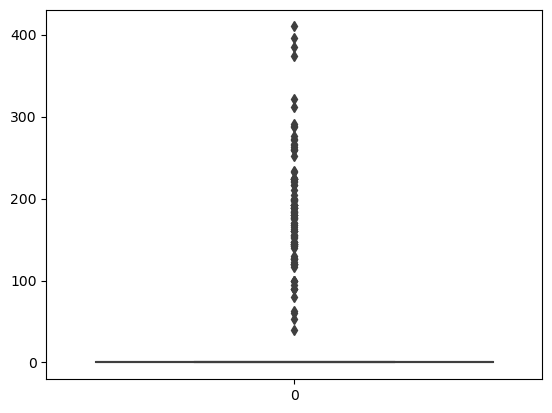

(1291, 81)

In [11]:
sns.boxplot(house['ScreenPorch'])
plt.show()
Q1 = house['ScreenPorch'].quantile(0.1)
Q3 = house['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & (house['ScreenPorch'] <= Q3 + 1.5*IQR)]

house.shape

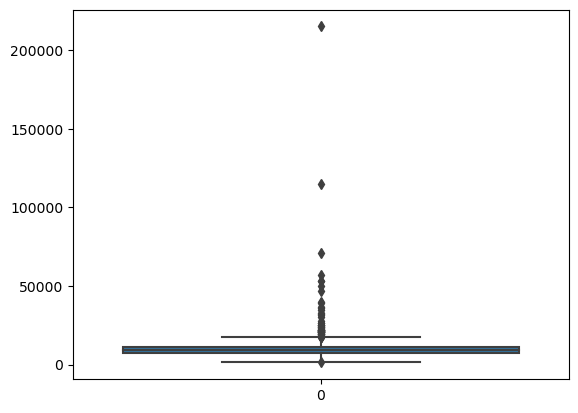

(1274, 81)

In [12]:
sns.boxplot(house['LotArea'])
plt.show()
Q1 = house['LotArea'].quantile(0.1)
Q3 = house['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & (house['LotArea'] <= Q3 + 1.5*IQR)]

house.shape

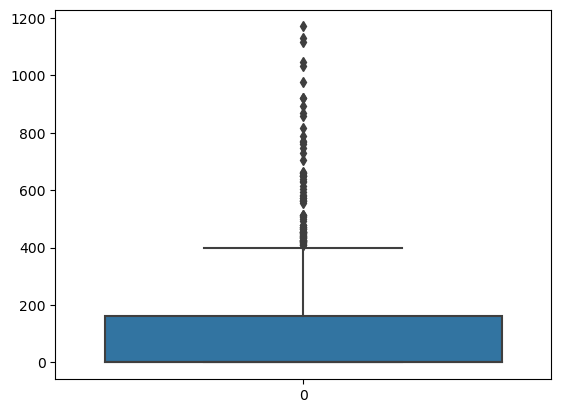

(1255, 81)

In [13]:
sns.boxplot(house['MasVnrArea'])
plt.show()
Q1 = house['MasVnrArea'].quantile(0.1)
Q3 = house['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & (house['MasVnrArea'] <= Q3 + 1.5*IQR)]

house.shape

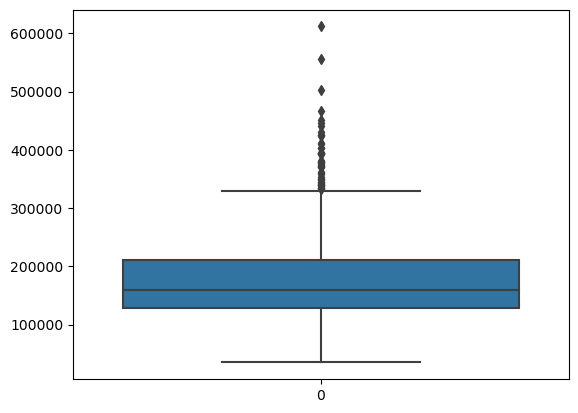

(1253, 81)

In [14]:
sns.boxplot(house['SalePrice'])
plt.show()
Q1 = house['SalePrice'].quantile(0.1)
Q3 = house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & (house['SalePrice'] <= Q3 + 1.5*IQR)]

house.shape

#### Find Correlation between numeric variables

In [15]:
df_numeric_house.info()

# Observations:

# There are 20 columns and 1253 rows.
# Let's see correlation between these variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1452 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  GarageArea     1460 non-null   int64  
 12  WoodDeckSF     1460 non-null   int64  
 13  OpenPorchSF    1460 non-null   int64  
 14  EnclosedPorch  1460 non-null   int64  
 15  3SsnPorch      1460 non-null   int64  
 16  ScreenPorch    1460 non-null   int64  
 17  PoolArea       1460 non-null   int64  
 18  MiscVal 

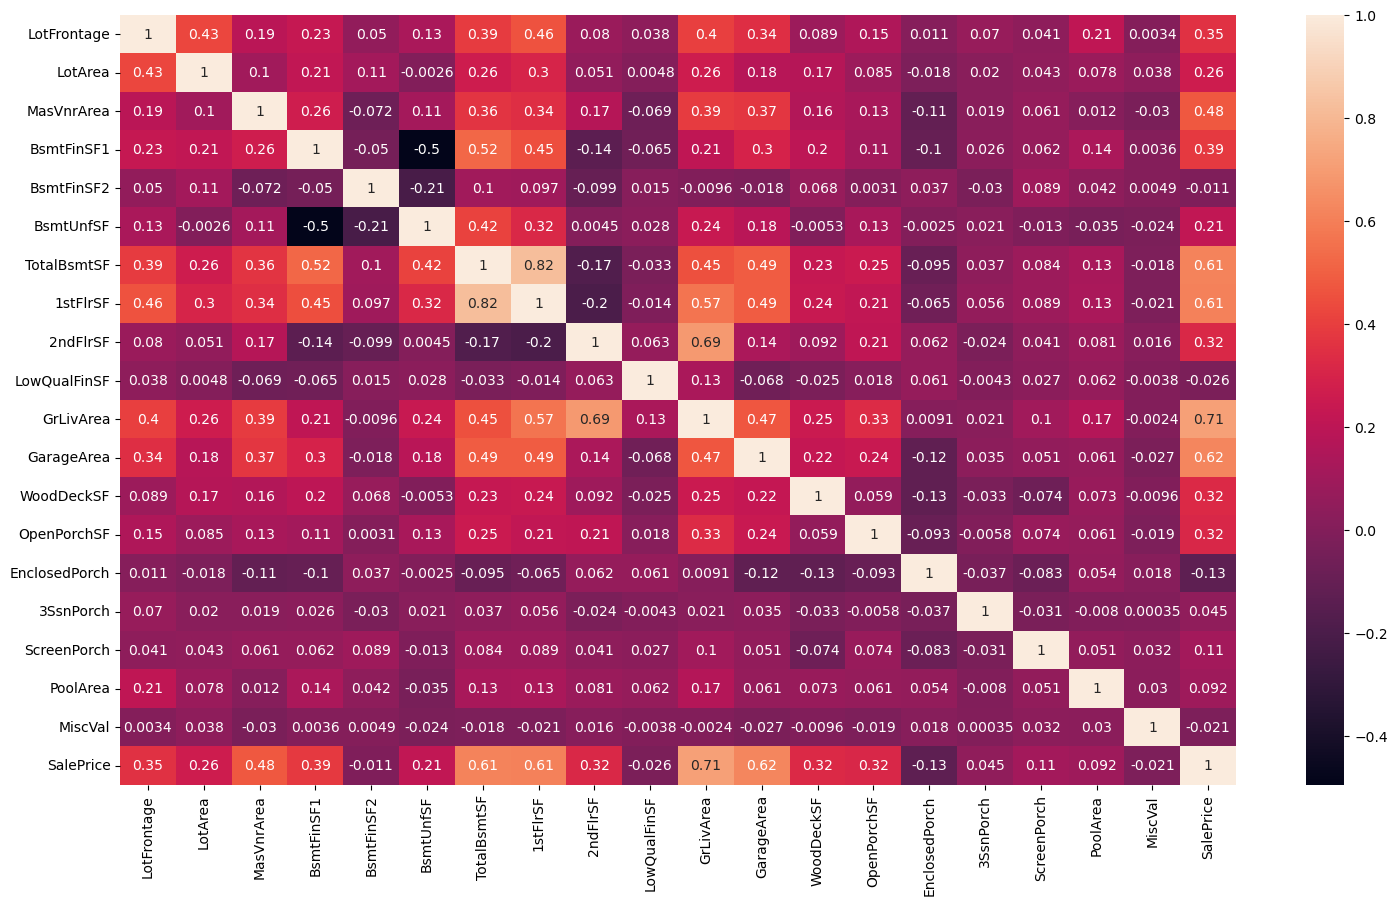

In [16]:
# Plot correlation matrix

cor = df_numeric_house.corr()
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()


#### Data Cleaning

In [17]:
house.info()

# Let's take care of columns having null values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1040 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          82 non-null     object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   int64  
 18  OverallC

In [18]:
# Taking care of null values. For different columns variation of missing values is more. So let's try to imput the values 
# instead of dropping and losing data.

house['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [19]:
# For house['LotFrontage'] let's impute 0 for missing values
house['LotFrontage'].fillna(0, inplace=True)

house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1253 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          82 non-null     object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   int64  
 18  OverallC

In [20]:
# Let's see hosue['Fence']

house['Fence'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

In [21]:
# hosue['Fence'] is object type, so let's treat it as per its values

house['Fence'].fillna('No Fence', inplace=True)

house['Fence'].head()

0    No Fence
1    No Fence
2    No Fence
3    No Fence
4    No Fence
Name: Fence, dtype: object

In [22]:
# Similarly for house['PoolQC'], house['FireplaceQu'], house['MasVnrType'] and house['Alley']

house['PoolQC'].fillna('No Pool', inplace=True)
house['PoolQC'].head()

0    No Pool
1    No Pool
2    No Pool
3    No Pool
4    No Pool
Name: PoolQC, dtype: object

In [23]:
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house['FireplaceQu'].head()

0    No Fireplace
1              TA
2              TA
3              Gd
4              TA
Name: FireplaceQu, dtype: object

In [24]:
house['MasVnrType'].fillna('None', inplace=True)
house['Alley'].fillna('No Alley', inplace=True)

house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1253 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          1253 non-null   object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   int64  
 18  OverallC

In [25]:
# Now Garage columns null to be replaced by same value

house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 

house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1253 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          1253 non-null   object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   int64  
 18  OverallC

In [26]:
# Converting year columns to number of years
house['YearBuilt'] = 2023 - house['YearBuilt']
house['YearRemodAdd'] = 2023 - house['YearRemodAdd']
house['GarageYrBlt'] = 2023 - house['GarageYrBlt']
house['YrSold'] = 2023 - house['YrSold']

In [27]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1253 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          1253 non-null   object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   int64  
 18  OverallC

In [28]:
# house['MiscFeature'] is almost null column, so let's drop it.

house = house.drop('MiscFeature', axis=1)
house.shape

(1253, 80)

In [29]:
# Now there are several int variables that are categorical variables, so conver them to object type to use create
# dummy variables from them
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   object 
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1253 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          1253 non-null   object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   object 
 18  OverallC

#### Map variable values to binary values (0 and 1)

In [30]:
#Converting to binary values
df_final_house = house
df_final_house['Street']

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1454    Pave
1455    Pave
1456    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1253, dtype: object

In [31]:
# List of variables to map

templist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
df_final_house[templist1] = df_final_house[templist1].apply(binary_map)

df_final_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,No Alley,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,0,2,15,WD,Normal,208500
1,2,20,RL,80.0,9600,1,No Alley,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,0,5,16,WD,Normal,181500
2,3,60,RL,68.0,11250,1,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,0,9,15,WD,Normal,223500
3,4,70,RL,60.0,9550,1,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,0,2,17,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,0,12,15,WD,Normal,250000


In [32]:
# List of variables to map

templist2 =  ['Utilities']

def map_utilities(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
df_final_house[templist2] = df_final_house[templist2].apply(map_utilities)

df_final_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,No Alley,Reg,Lvl,1,...,0,0,No Pool,No Fence,0,2,15,WD,Normal,208500
1,2,20,RL,80.0,9600,1,No Alley,Reg,Lvl,1,...,0,0,No Pool,No Fence,0,5,16,WD,Normal,181500
2,3,60,RL,68.0,11250,1,No Alley,IR1,Lvl,1,...,0,0,No Pool,No Fence,0,9,15,WD,Normal,223500
3,4,70,RL,60.0,9550,1,No Alley,IR1,Lvl,1,...,0,0,No Pool,No Fence,0,2,17,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,No Alley,IR1,Lvl,1,...,0,0,No Pool,No Fence,0,12,15,WD,Normal,250000


In [33]:
# List of variables to map

templist3 =  ['CentralAir']

def map_centralair(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
df_final_house[templist3] = df_final_house[templist3].apply(map_centralair)

df_final_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,No Alley,Reg,Lvl,1,...,0,0,No Pool,No Fence,0,2,15,WD,Normal,208500
1,2,20,RL,80.0,9600,1,No Alley,Reg,Lvl,1,...,0,0,No Pool,No Fence,0,5,16,WD,Normal,181500
2,3,60,RL,68.0,11250,1,No Alley,IR1,Lvl,1,...,0,0,No Pool,No Fence,0,9,15,WD,Normal,223500
3,4,70,RL,60.0,9550,1,No Alley,IR1,Lvl,1,...,0,0,No Pool,No Fence,0,2,17,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,No Alley,IR1,Lvl,1,...,0,0,No Pool,No Fence,0,12,15,WD,Normal,250000


In [34]:
# Create subset of object variables for creating dummies

house_categorical = house.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


#### Create Dummy Variables

In [35]:
# Create dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
# Drop original categorical variables
df_final_house = df_final_house.drop(list(house_categorical.columns), axis=1)

In [37]:
# concat dummy variables with final dataframe
df_final_house = pd.concat([df_final_house, house_dummies], axis=1)
df_final_house.shape

(1253, 300)

In [38]:
#let's drop Id column as it will not add any value to further analysis
df_final_house = df_final_house.drop('Id', axis=1)
df_final_house.shape

(1253, 299)

#### Splitting data between Train and Test

In [39]:
np.random.seed(0)
df_train, df_test = train_test_split(df_final_house, train_size = 0.70, test_size = 0.30, random_state = 100)


In [40]:
df_train.shape

# Observation
# Training data has got 877 records

(877, 299)

In [41]:
df_test.shape

# Observation:
# Test data has got 376 records

(376, 299)

#### Re-Scaling the features

In [42]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [43]:
df_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
df_train_numeric.shape

(877, 27)

In [44]:

df_train_numeric.head()

,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
746,0.0,8795,1,1,23,23,0.0,300,0,652,...,554,224,54,0,0,0,0,0,4,14
1052,100.0,9500,1,1,59,45,272.0,442,0,374,...,540,0,52,0,0,0,0,0,6,16
170,0.0,12358,1,1,82,73,0.0,360,0,360,...,660,237,0,0,0,0,0,0,5,16
1175,85.0,10678,1,1,31,23,337.0,700,0,983,...,541,0,33,0,0,0,0,0,4,16
972,55.0,7892,1,1,44,44,0.0,0,0,918,...,264,28,0,0,0,0,0,0,4,13


In [45]:
# Create Scaler Object for Re-Scaling
scaler = MinMaxScaler()
lst_numeric = df_train_numeric.columns.tolist()
X_train[lst_numeric] = scaler.fit_transform(X_train[lst_numeric])

X_train.head()


,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
746,0.000000,0.306955,1.0,0.0,0.065693,0.166667,0.000000,0.157563,0.0,0.302833,...,0,0,0,0,1,0,0,0,1,0
1052,0.653595,0.336583,1.0,0.0,0.328467,0.533333,0.345178,0.232143,0.0,0.173711,...,0,0,0,0,1,0,0,0,1,0
170,0.000000,0.456693,1.0,0.0,0.496350,1.000000,0.000000,0.189076,0.0,0.167209,...,0,0,0,0,1,0,0,0,1,0
1175,0.555556,0.386090,1.0,0.0,0.124088,0.166667,0.427665,0.367647,0.0,0.456572,...,0,0,0,0,1,0,0,0,1,0
972,0.359477,0.269006,1.0,0.0,0.218978,0.516667,0.000000,0.000000,0.0,0.426382,...,0,0,0,0,1,0,0,0,1,0


In [46]:
y_train = np.log(y_train)
y_train

746     12.371587
1052    12.013701
170     11.763684
1175    12.560244
972     11.507913
          ...    
947     12.506177
62      12.218495
412     12.310433
92      12.004568
935     11.288531
Name: SalePrice, Length: 877, dtype: float64

In [47]:
X_train = X_train.fillna(X_train.interpolate())

### Build the Model

#### Ridge Regression

In [48]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}

#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


In [49]:
ridge = Ridge()

In [50]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.07594976785444951


In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018541,0.007063,0.006201,0.001470,0.0001,{'alpha': 0.0001},-0.107553,-0.118142,-0.089660,-0.085783,...,-0.095671,0.014970,24,-0.045660,-0.047619,-0.048998,-0.047122,-0.051766,-0.048233,0.002064
1,0.018203,0.002229,0.006992,0.002102,0.001,{'alpha': 0.001},-0.106960,-0.117404,-0.089526,-0.086281,...,-0.095267,0.014869,23,-0.045695,-0.047658,-0.049004,-0.047161,-0.051810,-0.048266,0.002064
2,0.014209,0.003157,0.005585,0.001846,0.01,{'alpha': 0.01},-0.102778,-0.113089,-0.088682,-0.087791,...,-0.092916,0.013971,22,-0.046129,-0.047848,-0.049059,-0.047421,-0.052209,-0.048533,0.002063
3,0.015601,0.002431,0.005399,0.000803,0.05,{'alpha': 0.05},-0.095948,-0.101222,-0.087542,-0.087085,...,-0.088308,0.010695,21,-0.047264,-0.048383,-0.049311,-0.047969,-0.053057,-0.049197,0.002040
4,0.015389,0.002863,0.004596,0.000801,0.1,{'alpha': 0.1},-0.093145,-0.093611,-0.086677,-0.085956,...,-0.085419,0.009407,19,-0.047962,-0.048994,-0.049544,-0.048413,-0.053683,-0.049719,0.002052
5,0.012404,0.001346,0.005198,0.001473,0.2,{'alpha': 0.2},-0.090389,-0.086472,-0.085684,-0.084405,...,-0.082485,0.008736,18,-0.048778,-0.050035,-0.049943,-0.049095,-0.054511,-0.050472,0.002076
6,0.013614,0.002428,0.004989,0.001550,0.3,{'alpha': 0.3},-0.088397,-0.083092,-0.085031,-0.083544,...,-0.080849,0.008539,16,-0.049323,-0.050779,-0.050299,-0.049658,-0.055103,-0.051033,0.002097
7,0.013199,0.001723,0.005803,0.001732,0.4,{'alpha': 0.4},-0.087021,-0.080918,-0.084572,-0.082858,...,-0.079752,0.008424,14,-0.049813,-0.051340,-0.050633,-0.050142,-0.055550,-0.051496,0.002091
8,0.019395,0.001862,0.008200,0.002142,0.5,{'alpha': 0.5},-0.085926,-0.079364,-0.084235,-0.082276,...,-0.078914,0.008363,11,-0.050279,-0.051793,-0.050974,-0.050536,-0.055940,-0.051904,0.002082
9,0.019799,0.001327,0.008199,0.001166,0.6,{'alpha': 0.6},-0.085104,-0.078228,-0.083951,-0.081808,...,-0.078289,0.008305,10,-0.050723,-0.052190,-0.051298,-0.050887,-0.056279,-0.052275,0.002066


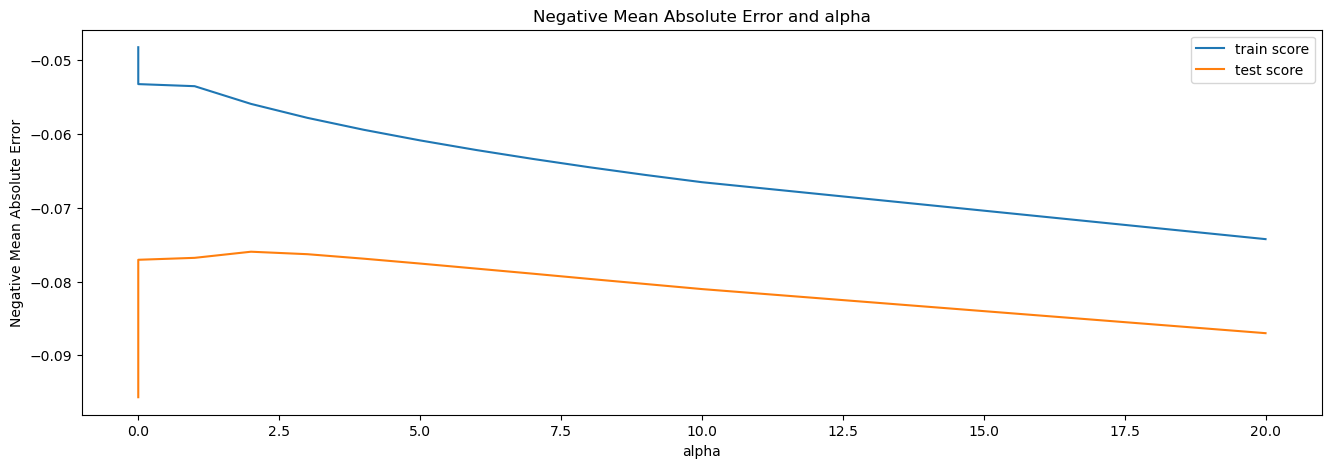

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### R Squared for train data (Ridge)

In [54]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.50481136e-02,  1.79969114e-01, -3.18595611e-02,  0.00000000e+00,
       -1.92608914e-01, -6.52364579e-02,  2.34671215e-02,  1.67922425e-01,
        9.97236836e-02,  5.63829534e-02,  1.83440270e-01,  4.17812331e-02,
        2.33656629e-01,  1.60189533e-01, -5.43570437e-04,  3.06153799e-01,
        3.50743572e-03,  1.25628908e-01,  8.13282741e-02,  8.59763454e-02,
        2.55213719e-02,  6.51362752e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.65891165e-03,  4.45849759e-03, -2.68952284e-02,
        1.24295218e-02,  2.28586121e-02,  1.10543134e-03, -4.23055638e-02,
        2.89029335e-02,  3.51327079e-02, -3.69213020e-02, -2.35834020e-02,
       -2.02665176e-02,  1.69048121e-02, -7.63099900e-02, -2.28037955e-02,
       -8.21672629e-03,  9.21716894e-02,  2.96537776e-02,  4.61087028e-02,
        3.00896824e-02,  2.46925307e-02,  4.69621497e-02, -1.02533128e-02,
       -5.80330727e-02,  5.19340406e-03,  1.11852352e-02, -3.52601149e-02,
        1.12119681e-02,  

In [55]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9550311999349087


#### Lasso Regression

In [56]:
lasso = Lasso()

In [57]:
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.07614430480787975


In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.136398,0.047211,0.008400,0.001626,0.0001,{'alpha': 0.0001},-0.084199,-0.075471,-0.080914,-0.080131,...,-0.076144,0.008537,1,-0.051670,-0.052959,-0.052657,-0.052157,-0.057194,-0.053327,0.001983
1,0.029402,0.002333,0.008601,0.000492,0.001,{'alpha': 0.001},-0.083183,-0.084434,-0.088318,-0.080661,...,-0.080260,0.008162,2,-0.067674,-0.068260,-0.066353,-0.068190,-0.070821,-0.068260,0.001452
2,0.021201,0.001939,0.008599,0.001019,0.01,{'alpha': 0.01},-0.144694,-0.122987,-0.137323,-0.126214,...,-0.126537,0.014745,3,-0.119942,-0.121738,-0.122917,-0.120612,-0.125077,-0.122057,0.001818
3,0.020999,0.001999,0.008200,0.001326,0.05,{'alpha': 0.05},-0.229042,-0.198169,-0.238072,-0.188600,...,-0.206190,0.023497,4,-0.202204,-0.202248,-0.200987,-0.205524,-0.207451,-0.203683,0.002413
4,0.018000,0.001790,0.010001,0.001998,0.1,{'alpha': 0.1},-0.314637,-0.274363,-0.313813,-0.270938,...,-0.285011,0.025119,5,-0.284356,-0.282813,-0.276486,-0.286647,-0.282777,-0.282616,0.003374
5,0.015404,0.003664,0.007195,0.001469,0.2,{'alpha': 0.2},-0.324391,-0.290967,-0.326605,-0.286744,...,-0.299931,0.021928,6,-0.293427,-0.301557,-0.293304,-0.302975,-0.306500,-0.299552,0.005302
6,0.015799,0.002398,0.006000,0.002000,0.3,{'alpha': 0.3},-0.324391,-0.290967,-0.326605,-0.286744,...,-0.299931,0.021928,6,-0.293427,-0.301557,-0.293304,-0.302975,-0.306500,-0.299552,0.005302
7,0.013004,0.001897,0.005194,0.000981,0.4,{'alpha': 0.4},-0.324391,-0.290967,-0.326605,-0.286744,...,-0.299931,0.021928,6,-0.293427,-0.301557,-0.293304,-0.302975,-0.306500,-0.299552,0.005302
8,0.013792,0.002388,0.005599,0.002061,0.5,{'alpha': 0.5},-0.324391,-0.290967,-0.326605,-0.286744,...,-0.299931,0.021928,6,-0.293427,-0.301557,-0.293304,-0.302975,-0.306500,-0.299552,0.005302
9,0.012759,0.003581,0.005597,0.001854,0.6,{'alpha': 0.6},-0.324391,-0.290967,-0.326605,-0.286744,...,-0.299931,0.021928,6,-0.293427,-0.301557,-0.293304,-0.302975,-0.306500,-0.299552,0.005302


In [60]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   

In [61]:
# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.090496,0.030355,0.005196,0.001156,0.0001,{'alpha': 0.0001},0.908709,0.896676,0.917088,0.893633,...,0.912181,0.018355,1,0.963469,0.963530,0.959400,0.963677,0.957068,0.961429,0.002711
1,0.019790,0.003312,0.005403,0.001361,0.001,{'alpha': 0.001},0.919215,0.892795,0.896232,0.906806,...,0.909986,0.015491,2,0.934425,0.938761,0.935211,0.936885,0.933375,0.935731,0.001899
2,0.014388,0.002051,0.004801,0.000401,0.01,{'alpha': 0.01},0.787253,0.780200,0.752664,0.779951,...,0.785637,0.024316,3,0.791101,0.805169,0.793871,0.808944,0.802990,0.800415,0.006805
3,0.012404,0.002727,0.006400,0.001751,0.05,{'alpha': 0.05},0.442596,0.465481,0.385170,0.483025,...,0.452270,0.036858,4,0.445035,0.468831,0.460929,0.465694,0.467632,0.461624,0.008721
4,0.011795,0.003114,0.006199,0.001471,0.1,{'alpha': 0.1},0.048038,0.086093,0.054562,0.085590,...,0.074422,0.019490,5,0.049514,0.090784,0.091207,0.084374,0.112289,0.085633,0.020368
5,0.012806,0.003055,0.005793,0.001837,0.2,{'alpha': 0.2},-0.000106,-0.005716,-0.009400,-0.001954,...,-0.005345,0.003826,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.010198,0.000398,0.004795,0.001163,0.3,{'alpha': 0.3},-0.000106,-0.005716,-0.009400,-0.001954,...,-0.005345,0.003826,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.011599,0.002333,0.004799,0.000749,0.4,{'alpha': 0.4},-0.000106,-0.005716,-0.009400,-0.001954,...,-0.005345,0.003826,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.010593,0.000784,0.005005,0.001566,0.5,{'alpha': 0.5},-0.000106,-0.005716,-0.009400,-0.001954,...,-0.005345,0.003826,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.014404,0.003722,0.006186,0.001597,0.6,{'alpha': 0.6},-0.000106,-0.005716,-0.009400,-0.001954,...,-0.005345,0.003826,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


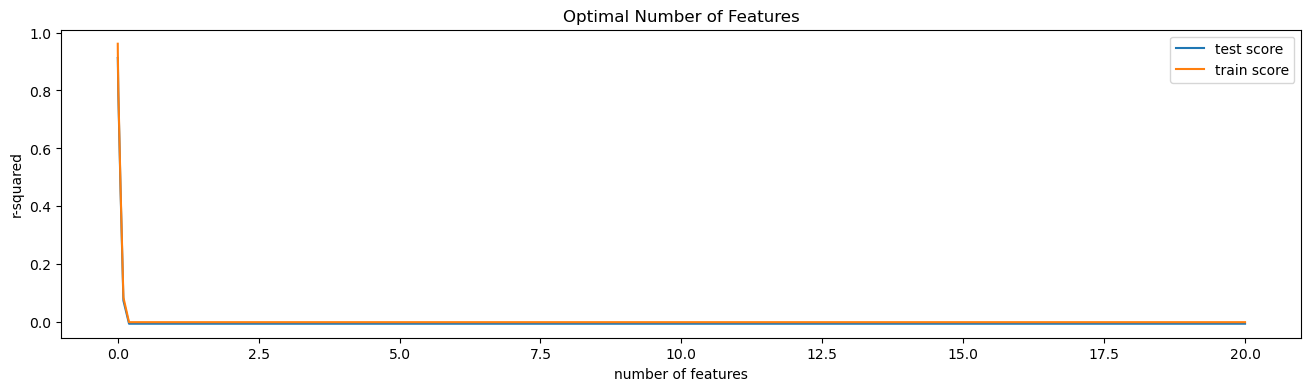

In [63]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

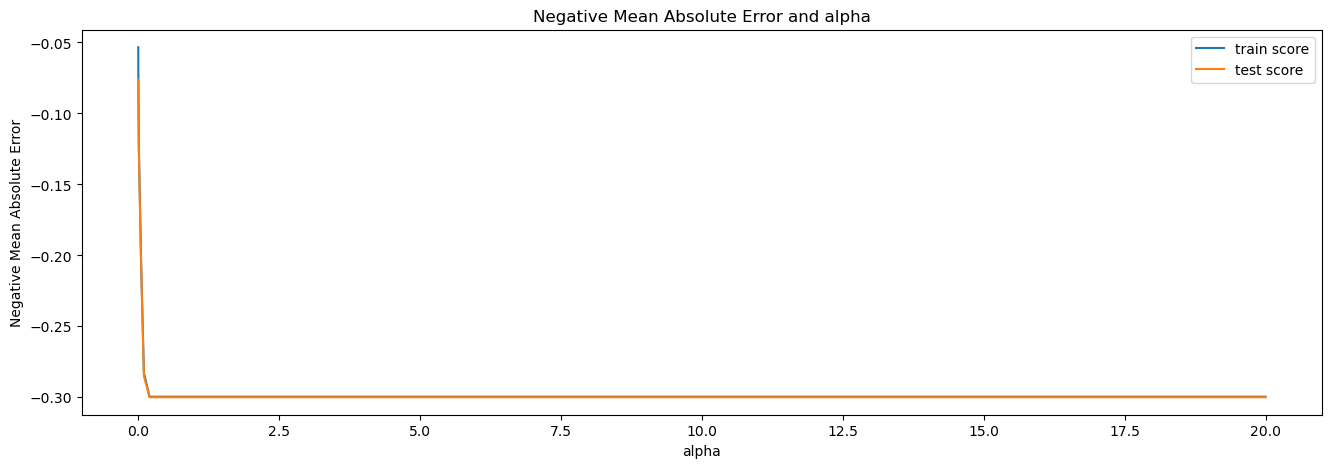

In [64]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [65]:
# From the best param scores we got optimum lambda = 0.0001
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 



Lasso(alpha=0.0001)

In [66]:
lasso.coef_

array([-1.15409196e-02,  2.08421097e-01, -1.69270662e-02,  0.00000000e+00,
       -3.64043496e-01, -5.38364072e-02,  8.08301737e-03,  1.24667886e-01,
        8.37478791e-02, -0.00000000e+00,  2.49973635e-01,  2.97339021e-02,
        0.00000000e+00,  5.85440449e-02, -1.75857264e-02,  7.89101940e-01,
        0.00000000e+00,  1.55234152e-01,  7.46177091e-02,  9.31083785e-02,
        3.03340367e-02,  8.21092780e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.75334075e-03,  3.99957214e-03, -8.87591651e-03,
        0.00000000e+00,  2.21683022e-02,  1.94201034e-03, -5.56224825e-02,
        2.19919951e-02,  0.00000000e+00, -3.14522883e-02, -1.22648012e-02,
       -3.03770202e-02,  0.00000000e+00, -1.12220302e-01, -2.35056841e-02,
       -0.00000000e+00,  8.76556702e-02,  0.00000000e+00,  2.41909616e-02,
        9.80431168e-03,  1.96141523e-02,  3.96943340e-02, -2.01390491e-04,
       -6.70038962e-02,  7.71809937e-03,  0.00000000e+00, -3.93955797e-02,
        3.30209089e-03,  

#### R-squared on train data (Lasso)

In [67]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9572718731713001


#### Let's predict the R-squared on test data

In [68]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [69]:
df_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])
df_test_numeric.shape


(376, 27)

In [70]:
lst_numeric_test = df_test_numeric.columns.tolist()
X_test[lst_numeric_test] = scaler.transform(X_test[lst_numeric_test])


In [71]:
y_test = np.log(y_test)

In [72]:
X_test = X_test.fillna(X_test.interpolate())

#### Predict using ridge

In [73]:
alpha = 2

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.8866746130611688


In [74]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.019208308159341166


In [75]:
# House prices prediction by the model with ridge regression
house_prices = np.exp(y_test_pred)

#### Export the predicted prices

In [76]:
house_prices_ridge = pd.DataFrame({'Id': X_test.index ,'SalePrice': house_prices })
house_prices_ridge.to_csv("house_prices_ridge.csv", index=False)

#### Predict using Lasso

In [77]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8840550697175393


In [78]:
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.019652312783021333


#### # House prices prediction by the model with Lasso regression

In [79]:
house_prices_2 = np.exp(y_test_pred)

#### Export predicted house prices with Lasso regression

In [80]:
house_prices_lasso = pd.DataFrame({'Id': X_test.index ,'SalePrice': house_prices_2 })
house_prices_lasso.to_csv("house_prices_lasso.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'house_prices_lasso.csv'

### Que1: Which variables are significant in predicting the price of a house?

##### Ans: From the coefficients list of lasso as shown before prediction on test data we can see that which variables are significant to predict the housing prices. The variables which have coefficients shrink to zero are not contributing to the prediction at all. 

### Que 2: How well those variables describe the price of a house?

##### Ans: From above results we can say that:
#####          1) Ridge Regression on Train data:  95.5%  and on Test data: 88.7% accurately describes the housing prices.
#####          2) Lasso Regression on Train data: 95.72% and on Test data: 88.4% accurately describes the housing prices. 

### Que 3: Determine the optimal value of lambda for ridge and lasso regression.

##### Ans:  From the best params
#####           Optimum value of lambda for Ridge Regresssion is: 2
#####           Optimum value  of lambda for Lasso Regression is: 0.0001